In [1]:
import os
import re
import cv2
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

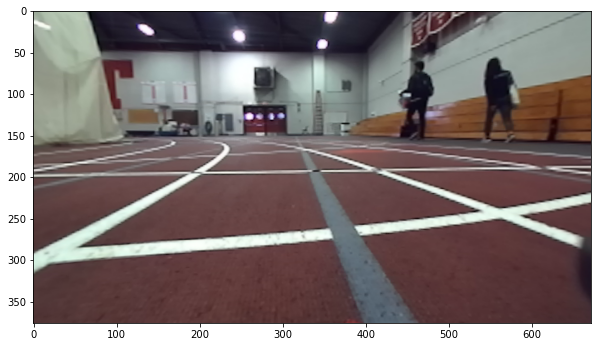

In [2]:
test_image_path="../media/TrackPics/4_whitelines.png"
image = cv2.imread(test_image_path)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

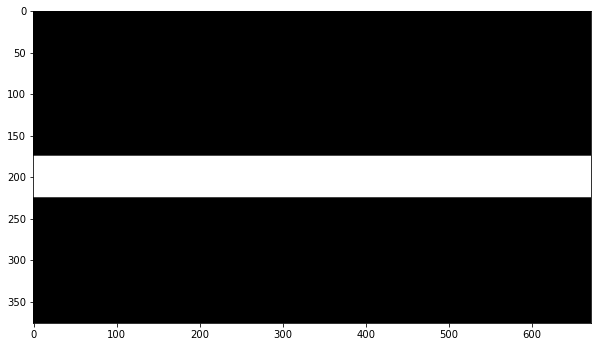

In [17]:
# create a zero array
stencil = np.zeros_like(image[:,:,0])
# specify coordinates of the polygon
#mid_polygon = np.array([[25,376], [250,200], [400,200], [650,376]])
#polygon = np.array([[0,376], [0,150], [672,150], [672,376]])
mid_polygon = np.array([[0,376], [0,225], [672,225], [672,376]])
polygon = np.array([[0,376], [0,175], [672,175], [672,376]])
# fill polygon with ones
cv2.fillConvexPoly(stencil, polygon, 1)
cv2.fillConvexPoly(stencil, mid_polygon, 0)
plt.figure(figsize=(10,10))
plt.imshow(stencil, cmap= "gray")
plt.show()

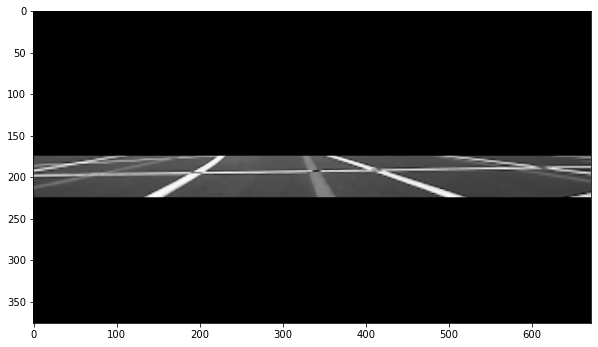

In [18]:
# apply polygon as a mask on the frame
img = cv2.bitwise_and(image[:,:,0], image[:,:,0], mask=(stencil))

# plot masked frame
plt.figure(figsize=(10,10))
plt.imshow(img, cmap= "gray")
plt.show()